In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle
from helper_functions import *

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
sns.set_style("darkgrid")

## 3D Grid Results (40%)

In [28]:
columns=['MainEngine','SideEngine','Mass','Rewards','Time']
labels=['run-0','run-1','run-2','run-3','run-4','run-5']

data_CS = read_test_data("CS", n_runs=5, names=columns)
data_C = read_test_data("C", n_runs=5, names=columns)
data_S = read_test_data("S", n_runs=5, names=columns)

rows = data_CS[0].shape[0]
cols = len(columns)

f0_CS, f1_CS = prepare_f0s_and_f1s(data_CS, n_runs=5, rows=rows, cols=cols)
f0_C, f1_C   = prepare_f0s_and_f1s(data_C, n_runs=5, rows=rows, cols=cols)
f0_S, f1_S   = prepare_f0s_and_f1s(data_S, n_runs=5, rows=rows, cols=cols)

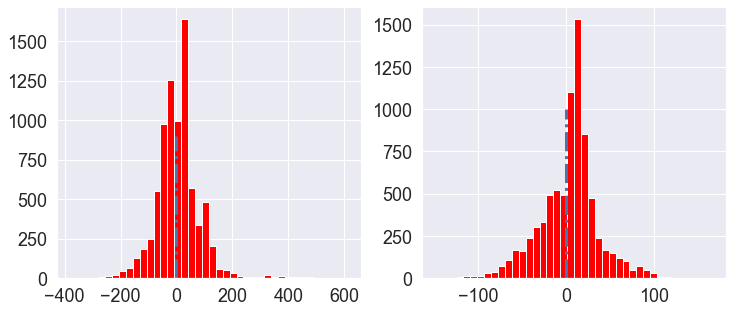

In [23]:
# plot_singleTest(data_CS[0], zero_line=[1000,1000], fname=["CS"])
plot_comparePair(data_CS[1], data_S[1], zero_line=[900,1000], fname=["CS","S"])

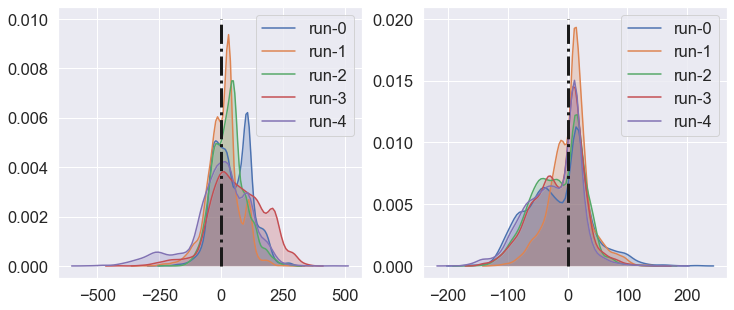

In [29]:
plot_Density(f0_CS, f1_CS, f0_S, f1_S, n_runs=5, zero=[0.01,0.020], labels=labels, save=False, fname="CS_vs_S.png")

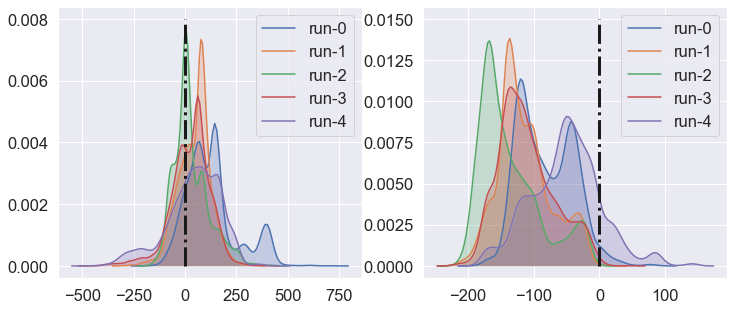

In [30]:
plot_Density(f0_CS, f1_CS, f0_C, f1_C, n_runs=5, zero=[0.008,0.015], labels=labels, save=False, fname="CS_vs_C.png")


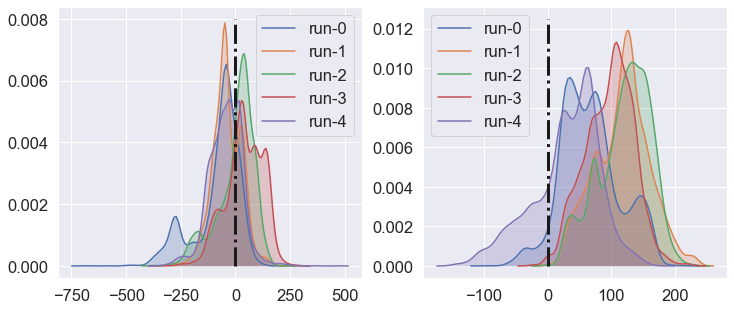

In [31]:
plot_Density(f0_C, f1_C, f0_S, f1_S, n_runs=5, zero=[0.008,0.0125], labels=labels, save=False, fname="C_vs_S.png")

## Contour Plots

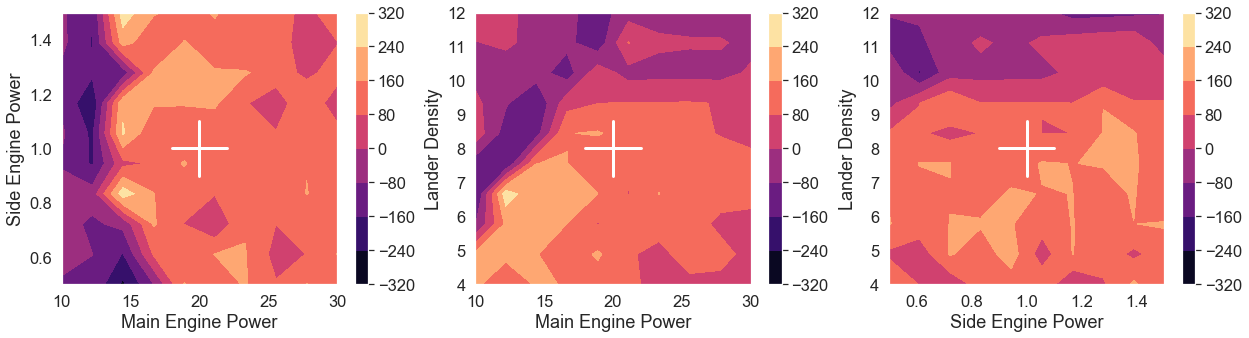

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(21, 5))
ax0, ax1, ax2 = axes.flatten()
# plt.figure(figsize=(18,10))

font_size=18
# cmap_scheme = 'viridis'
# cmap_scheme = 'plasma'
# cmap_scheme = 'inferno'
cmap_scheme = 'magma'

# MainEngine(M)-SideEngine(S)
# MainEngine(M)-LanderDensity(D)
# SideEngine(S)-LanderDensity(D)

plt.subplot(1,3,1)
# plt.setp(ax0.get_xticklabels(), fontsize=font_size)
# plt.setp(ax0.get_yticklabels(), fontsize=font_size)
MS_CS_f0, MS_CS_f1, M, S = pickle.load(open("Context_Skill/CS_Mass_Side_2Dplots.p","rb"))
MS_S_f0, MS_S_f1, M, S = pickle.load(open("Skill_only/S_Mass_Side_2Dplots.p","rb"))
CS1 = plt.contourf(M, S, MS_CS_f0-MS_S_f0, cmap=cmap_scheme)
plt.plot([18., 22.],[1., 1.],'w-',linewidth=3)
plt.plot([20., 20.],[0.9, 1.1],'w-',linewidth=3)
plt.colorbar(CS1)
# plt.title('Difference between CS and S')
plt.xlabel('Main Engine Power')
plt.ylabel('Side Engine Power')
# plt.show()

plt.subplot(1,3,2)
MD_CS_f0, MD_CS_f1, M, D = pickle.load(open("Context_Skill/CS_Mass_Dens_2Dplots.p","rb"))
MD_S_f0, MD_S_f1, M, D = pickle.load(open("Skill_only/S_Mass_Dens_2Dplots.p","rb"))
CS2 = plt.contourf(M, D, MD_CS_f0-MD_S_f0, CS1.levels, cmap=cmap_scheme)
plt.plot([18., 22.],[8., 8.],'w-',linewidth=3)
plt.plot([20., 20.],[7.2, 8.8],'w-',linewidth=3)
ax1.set_aspect('equal', 'box')
plt.colorbar(CS2)
# plt.title('Difference between CS and S')
plt.xlabel('Main Engine Power')
plt.ylabel('Lander Density')
# plt.show()

plt.subplot(1,3,3)
SD_CS_f0, SD_CS_f1, S, D = pickle.load(open("Context_Skill/CS_Side_Dens_2Dplots.p","rb"))
SD_S_f0, SD_S_f1, S, D = pickle.load(open("Skill_only/S_Side_Dens_2Dplots.p","rb"))
CS3 = plt.contourf(S, D, SD_CS_f0-SD_S_f0, CS1.levels, cmap=cmap_scheme)
plt.plot([0.9, 1.1],[8., 8.],'w-',linewidth=3)
plt.plot([1., 1.],[7.2, 8.8],'w-',linewidth=3)
ax2.set_aspect('equal', 'box')
plt.colorbar(CS3)
# plt.title('Difference between CS and S')
plt.xlabel('Side Engine Power')
plt.ylabel('Lander Density')
# plt.show()

# plt.savefig('fig_CS_contour_plots.png', dpi=300, bbox_inches = 'tight')
plt.show()